In [1]:
from boson_data_lib import *
import numpy as np
import scipy.linalg as sl
import os
import pandas as pd
import glob

In [2]:
import h5py
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
os.chdir("/home/zah/POP23/TESTS/")

In [5]:
#file_name = "df_POP_fit_testD20_fix-Phi-up_2023-Aug-01_at_20-42.h5.pkl"
#file_name = 'df_POP_fit_trn20_tst3__fix-Phi-up_2023-Aug-03_at_23-19.h5.pkl'
#file_name = "df_POP_fit_trn4_gap_tst20_fix-Phi-up_2023-Aug-04_at_12-22.h5.pkl"
#file_name = 'df_POP_Rm_trn4_gap_tst20_fix-Phi-up_2023-Aug-04_at_17-07.h5.pkl'
#file_name = 'df_POP_Rm6_trn4_gap_tst20_fix-Phi-up_2023-Aug-04_at_18-40.h5.pkl'
#file_name = 'df_POP_Rm6_trn4_gap_tst20_fix-Phi-up_2023-Aug-04_at_18-40.h5.pkl'
#file_name = 'df_POP_Rm_523_trn4_gap_tst20_fix-Phi-up_2023-Aug-06_at_19-30.h5.pkl'
#file_name = 'df_POP_Rm_523_trn4_gap_tst20_fix-Phi-up_2023-Aug-06_at_20-29.h5.pkl'
#file_name = 'df_POP_RmLME_53354_trn4_gap_tst20_fix-Phi-up_2023-Aug-06_at_22-08.h5.pkl'
#file_name = 'df_POP_RmLME_53354_trn4_gap_tst20_fix-Phi-up_2023-Aug-06_at_22-58.h5.pkl'
#file_name = 'df_POP_RmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_15-44.h5.pkl'
#file_name = 'df_POP_NoRmLME_trn4_gap_tst20_fix-Phi-up_2023-Aug-07_at_16-29.h5.pkl'
file_name = 'df_POP_NoRmT0LME_trn4_gap_tst20_T0_fix-Phi-up_2023-Aug-10_at_12-14.h5.pkl'


df = pd.read_pickle(file_name)

In [6]:
df.columns

Index(['Gamma', 'State', 'Time', 'gt', 'F_lme_exact', 'InF_lme_exact',
       'F_sidexact_exact', 'InF_sidexact_exact', 'F_sidlme_lme',
       'InF_sidlme_lme', 'Distance'],
      dtype='object')

In [7]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

df['Gamma'].replace(to_replace= '0.079477', value = '0.079', inplace=True )
df['Gamma'].replace(to_replace= '0.79477', value = '0.795', inplace=True )
df['Gamma'].replace(to_replace= '0.25133', value = '0.251', inplace=True )
df['Gamma'].replace(to_replace= '2.5133', value = '2.513', inplace=True )
df['Gamma'].replace(to_replace= '7.9477', value = '7.948', inplace=True )

df['Gamma'] = df['Gamma'].astype(float)

In [8]:
df['LogInF_lme_exact'] = np.log10(df['InF_lme_exact'])
df['LogInF_sidlme_lme'] = np.log10(np.abs(df['InF_sidlme_lme']))
df['LogInF_sidexact_exact'] = np.log10(df['InF_sidexact_exact'])

In [9]:
import seaborn as sns

def log_infidelity_from_gamma(df, title, field):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y=field, cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.9
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(-1, 8.2)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.001), xmin=-0.5, xmax=7.2, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.3, np.log10(.001), '0.001', ha='left', va='center')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=7.2, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.3, np.log10(.01), '0.01', ha='left', va='center')
    
    
    #ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=6.5, colors='black', linestyles='--', alpha=0.8)
    #ax.text(6.7, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

In [10]:
def log_15_InFid_g(df, title, field):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y=field, cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -15
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    tick_labels = [r'$10^{-15}$', r'$10^{-14}$', r'$10^{-13}$', r'$10^{-12}$', r'$10^{-11}$', r'$10^{-10}$',
    r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$',
    r'$10^{-2}$', r'$10^{-1}$']
     
    ax.yaxis.set_ticks(tick_range, tick_labels)
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(-1, 8.2)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.001), xmin=-0.5, xmax=7.2, colors='black', linestyles='--', alpha=0.8)
    ax.text(7.3, np.log10(.001), '0.001', ha='left', va='center')
    
    return fig

/tmp/ipykernel_5146/249621793.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


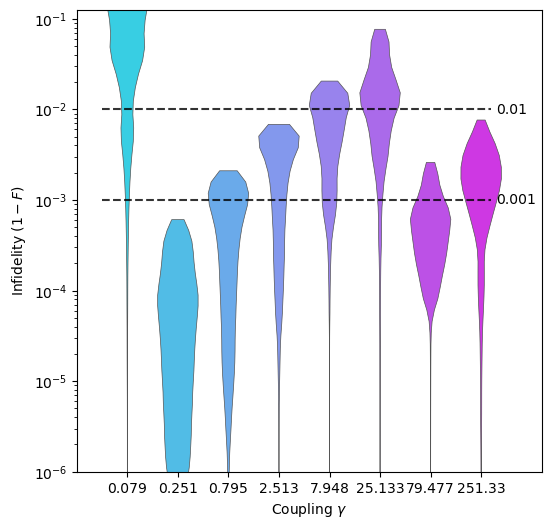

In [11]:
fig = log_infidelity_from_gamma(df, "", 'LogInF_sidexact_exact')
fig.savefig("Infid_T0NoRm_popexact4_test_exact20.pdf")
fig.show()

/tmp/ipykernel_15263/3615232934.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


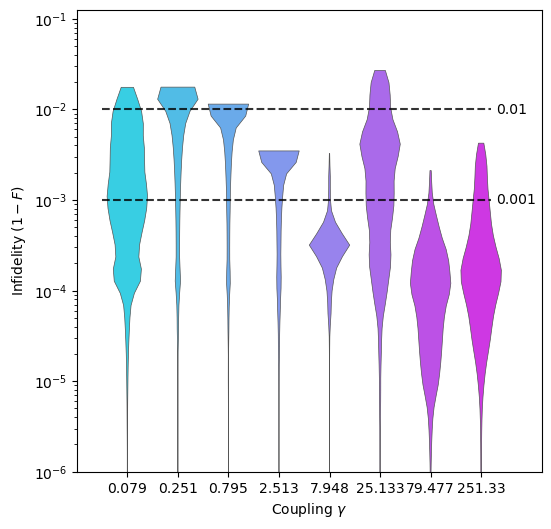

In [49]:
fig = log_infidelity_from_gamma(df, "", 'LogInF_sidexact_exact')
#fig.savefig("Infid_T0NoRm_popexact4_test_exact20.pdf")
fig.show()

/tmp/ipykernel_5146/1547352764.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


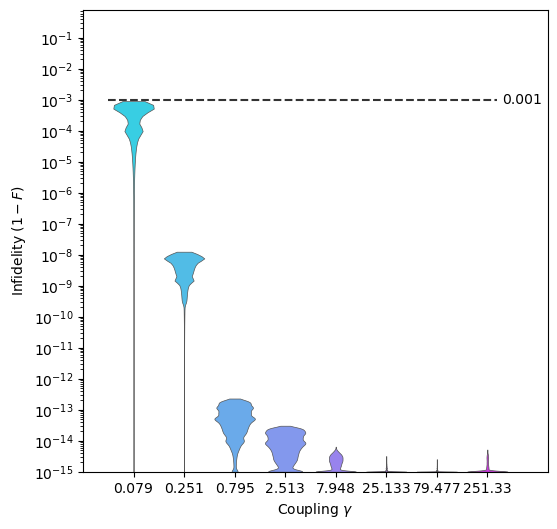

In [12]:
fig = log_15_InFid_g(df, '', 'LogInF_sidlme_lme')
fig.savefig("Infidelity_T0NoRM_POP_on_simLME.pdf")
fig.show()

/tmp/ipykernel_15263/68936236.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


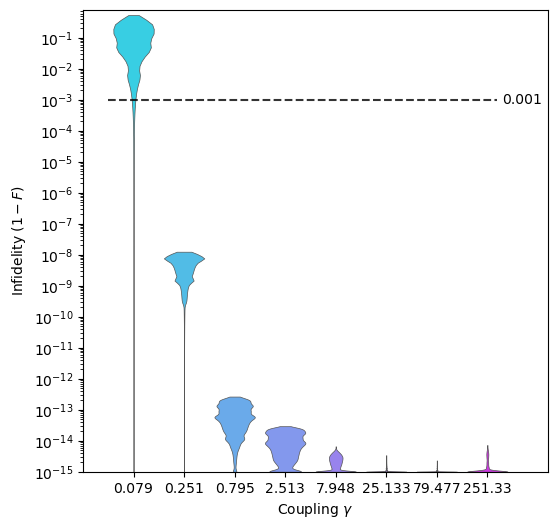

In [46]:
fig = log_15_InFid_g(df, '', 'LogInF_sidlme_lme')
#fig.savefig("Infidelity_NoRM_POP_on_simLME.pdf")
fig.show()

In [47]:
pd.unique(df["Gamma"])

array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 2.5133e+01,
       2.5133e+02, 7.9480e+00, 7.9477e+01])

In [18]:
LogInF_sidlme_lme_list =[df[df.Gamma == g].LogInF_sidlme_lme for g in pd.unique(df["Gamma"])]

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f220c2450d0>,
  <matplotlib.collections.PolyCollection at 0x7f220c22b2d0>]}

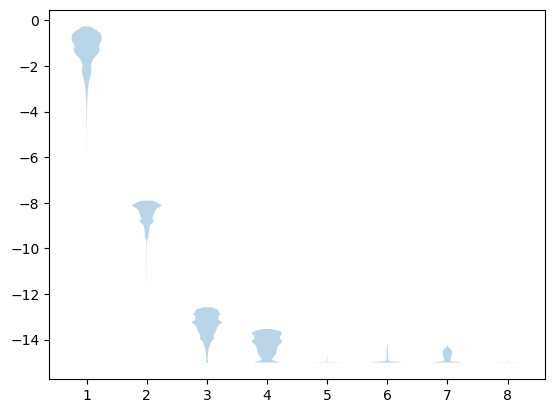

In [19]:
plt.violinplot(LogInF_sidlme_lme_list,
                  showmeans=False,
                  showmedians=False,
                  showextrema=False)
#plt.yscale('log')
#plt.ylim(1e-10, 1)